# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [2]:
import pandas as pd
data = pd.read_csv("/content/Age_share_death.csv")

data.shape

(6331, 8)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [3]:
unique_counts = data.nunique()

print("\nUnique values in each column:")
for column in data.columns:
    n_unique = data[column].nunique()
    print(f"{column}: {n_unique} unique values")

most_diverse_column = unique_counts.idxmax()
max_unique_values = unique_counts.max()

print(f"\nColumn with most diversity: {most_diverse_column} ({max_unique_values} unique values)")


Unique values in each column:
Country: 211 unique values
Codecountry: 205 unique values
Year: 30 unique values
Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number): 1326 unique values
Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number): 657 unique values
Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number): 772 unique values
Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number): 2303 unique values
Deaths - HIV/AIDS - Sex: Both - Age: 50-69 years (Number): 1543 unique values

Column with most diversity: Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number) (2303 unique values)


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [4]:
for column in data.columns:
    # Get number of unique values in column
    num_unique = data[column].nunique()

    # If only 1 unique value exists, print column name and the value
    if num_unique == 1:
        unique_value = data[column].iloc[0]  # Get the single unique value
        print(f"Column '{column}' has the same value '{unique_value}' in all rows")

print("\nAlternative check:")
for column in data.columns:
    # If value_counts has length 1, all values are the same
    if len(data[column].value_counts()) == 1:
        constant_value = data[column].iloc[0]
        print(f"Column '{column}' has constant value: {constant_value}")


Alternative check:


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

Numeric columns in dataset: ['Year', 'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)', 'Deaths - HIV/AIDS - Sex: Both - Age: 70+ years (Number)', 'Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number)', 'Deaths - HIV/AIDS - Sex: Both - Age: 15-49 years (Number)', 'Deaths - HIV/AIDS - Sex: Both - Age: 50-69 years (Number)']


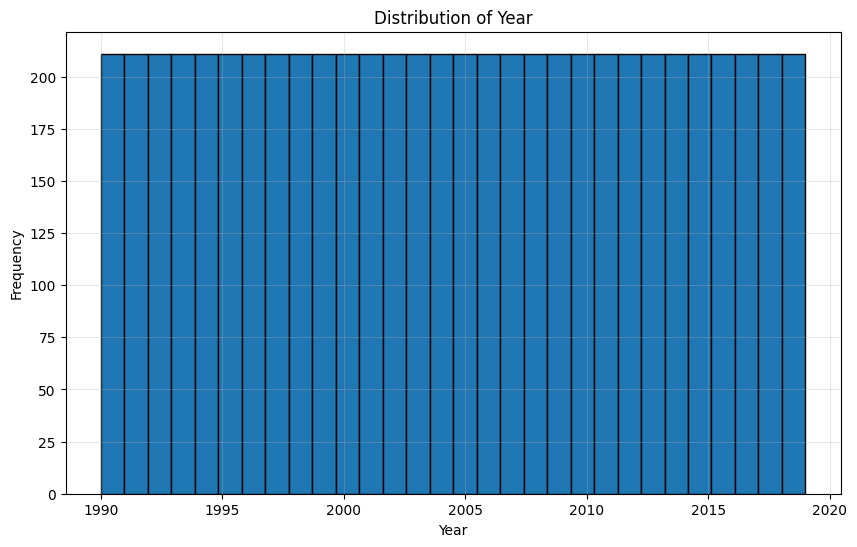

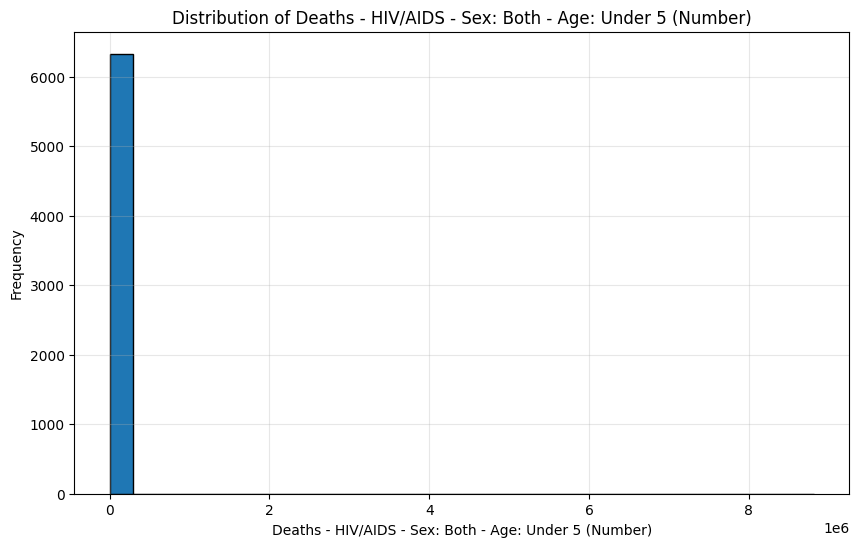

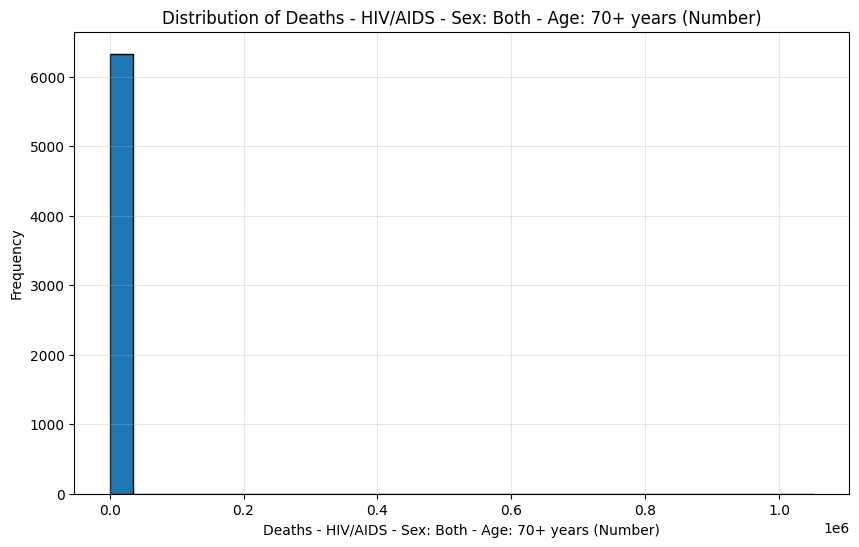

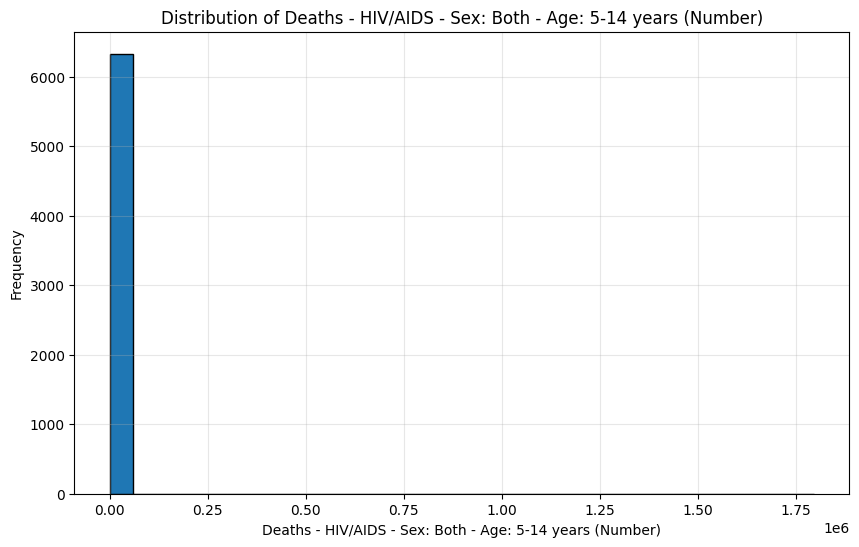

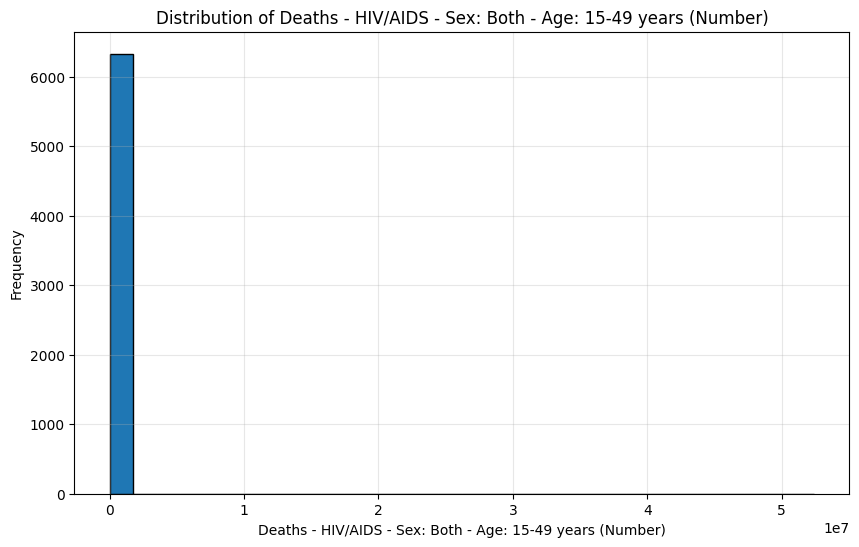

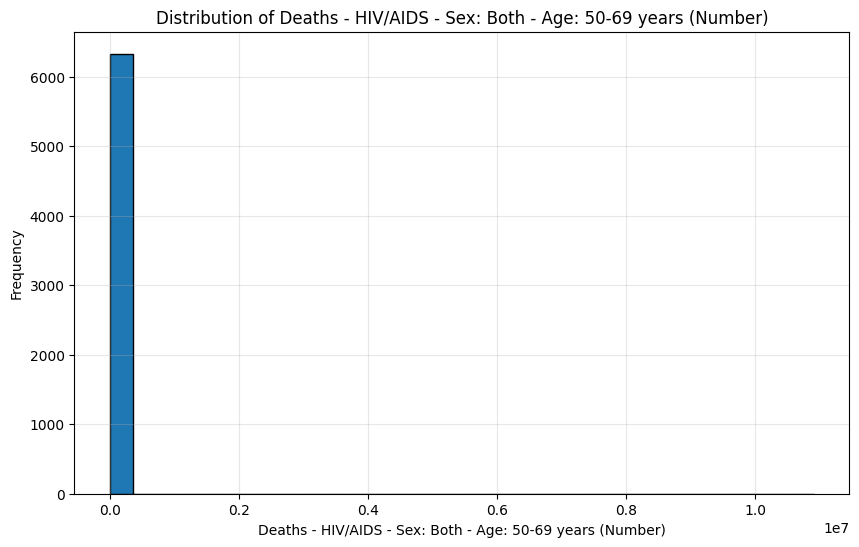

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# List all numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns in dataset:", numeric_columns.tolist())

# Create histogram for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))

    # Create histogram
    plt.hist(data[column], bins=30, edgecolor='black')

    # Add title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Add grid
    plt.grid(True, alpha=0.3)

    # Show the plot
    plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

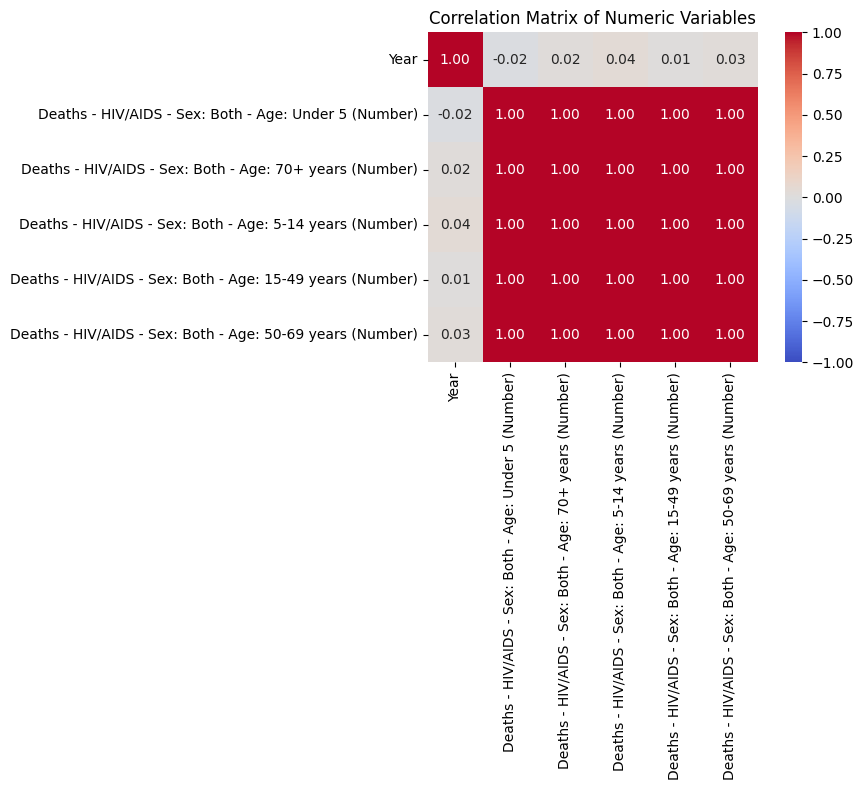

In [6]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            vmin=-1, vmax=1)

plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()



---



## Submitting Your Work

Submit your work as usual.